In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-house-prices/USA Housing Dataset.csv


**Load the dataset**

In [2]:
dataset = pd.read_csv("/kaggle/input/usa-house-prices/USA Housing Dataset.csv")
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


**Explore the dataset**

In [3]:
dataset.shape

(4140, 18)

In [4]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

**Let's remove unused columns**

In [5]:
dataset = dataset.drop(['date','statezip','country'], axis = 'columns')
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle


**Let's create barplot to check House in each city**

In [6]:
import matplotlib.pyplot as plt
# Count the number of houses in each city
city_counts = dataset['city'].value_counts()
city_counts

city
Seattle               1415
Renton                 261
Bellevue               260
Redmond                209
Kent                   167
Kirkland               166
Auburn                 162
Issaquah               162
Sammamish              158
Federal Way            131
Shoreline              112
Woodinville            103
Maple Valley            90
Mercer Island           81
Snoqualmie              65
Burien                  64
Kenmore                 58
Des Moines              52
North Bend              45
Covington               39
Duvall                  39
Lake Forest Park        33
Newcastle               31
Bothell                 30
SeaTac                  29
Vashon                  28
Tukwila                 28
Enumclaw                28
Carnation               18
Normandy Park           16
Medina                  11
Clyde Hill              10
Fall City                9
Black Diamond            7
Pacific                  6
Yarrow Point             4
Ravensdale             

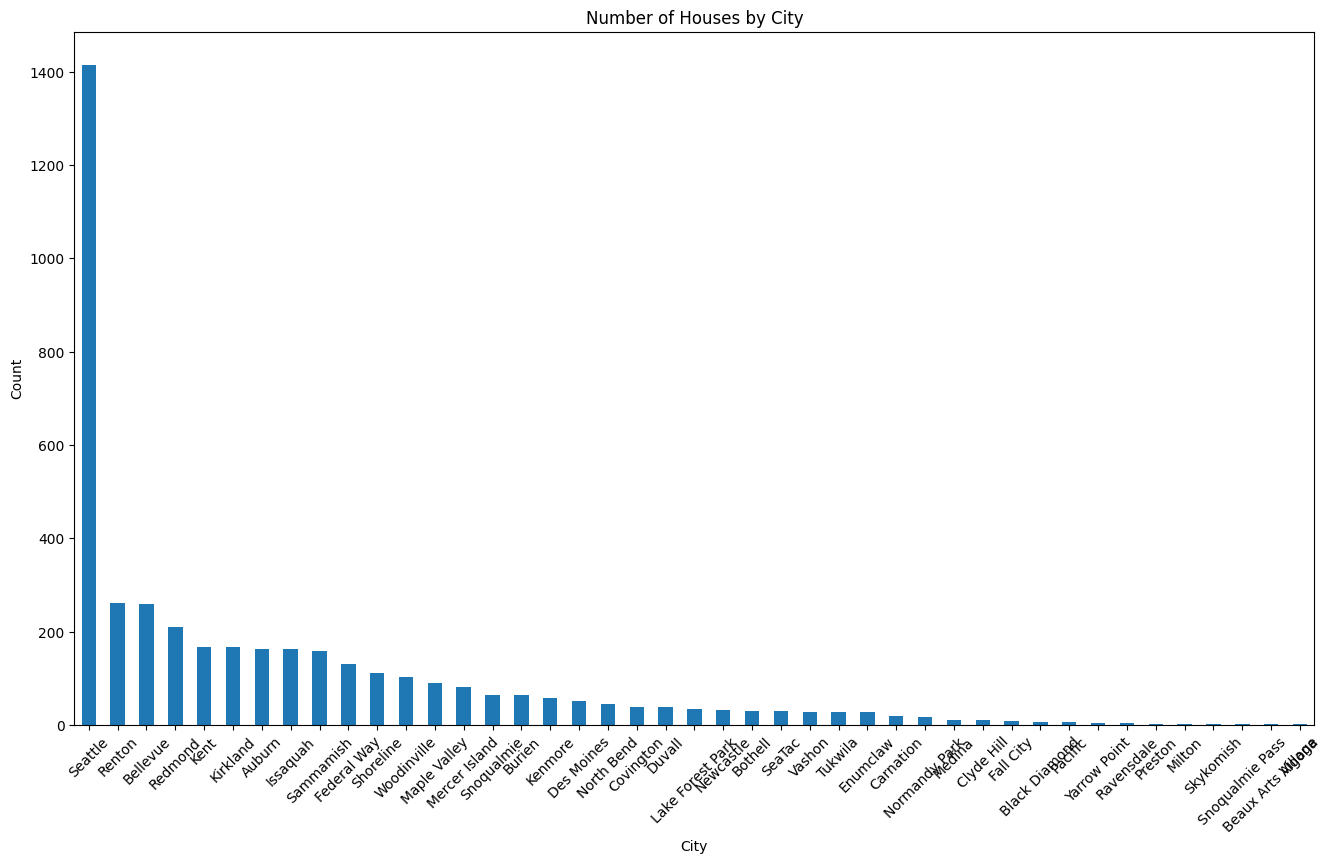

In [7]:
# Plot the bar chart
plt.figure(figsize=(16, 9))
city_counts.plot(kind='bar')
plt.title('Number of Houses by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Let's create barplot to check House in Street**

In [8]:
# Count the number of houses in each city
street_counts = dataset['street'].value_counts()
street_counts

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
14583 NE 58th St         2
14634 128th Ave NE       2
34115 SE Ash St          2
                        ..
9007 4th Ave NW          1
21924 234th Ave SE       1
4612 92nd Ave NE         1
2825 W Elmore Pl         1
18717 SE 258th St        1
Name: count, Length: 4079, dtype: int64

In [9]:
# Filter out streets with only one house
streets_greater_than_one = street_counts[street_counts > 1]
other_streets_count = street_counts[street_counts == 1].sum()
print(f'Streets with more than one house{streets_greater_than_one} and Streets with one house {other_streets_count}')

Streets with more than one housestreet
2520 Mulberry Walk NE        4
2500 Mulberry Walk NE        3
14583 NE 58th St             2
14634 128th Ave NE           2
34115 SE Ash St              2
7075-7131 Thompson Ave SE    2
8216 Linden Ave N            2
12418 NE 100th St            2
2300 14th Ave S              2
5010 Greenwood Ave N         2
11807 NE 105th Ct            2
5968 44th Ave S              2
11824 SE 203rd St            2
323 25th Ave S               2
11034 NE 26th Pl             2
11931 179th Pl NE            2
4507 Linden Ave N            2
11716 16th Ave NE            2
13420 121st Ave NE           2
611 N 46th St                2
22840 SE 269th St            2
1018 NE 96th St              2
619 9th Ave                  2
1149-1199 91st Ave NE        2
5703 Charlotte Ave SE        2
Indian Trail                 2
6520-6588 8th Ave NW         2
8434 W Mercer Way            2
21132 NE 42nd St             2
3510 S Holly St              2
2803 SW Bataan St            2


**In this code snippet, you can adjust the top_n variable to control the number of top streets displayed individually on the bar chart. The remaining streets will be grouped into an "Other" category. This approach can help simplify the visualization when dealing with a large number of categories.**

In [10]:
# Choose the top N streets to display individually
top_n = 10  # Choose the number of top streets to display
top_streets = streets_greater_than_one.head(top_n)

# Sum the counts of the remaining streets
other_count = streets_greater_than_one.sum() - top_streets.sum()

**concatenate the two series together using pd.concat() to create the aggregated_counts series**

In [11]:
# Create a new series with aggregated counts
aggregated_counts = pd.concat([top_streets, pd.Series([other_count], index=['Other'])])
aggregated_counts

2520 Mulberry Walk NE         4
2500 Mulberry Walk NE         3
14583 NE 58th St              2
14634 128th Ave NE            2
34115 SE Ash St               2
7075-7131 Thompson Ave SE     2
8216 Linden Ave N             2
12418 NE 100th St             2
2300 14th Ave S               2
5010 Greenwood Ave N          2
Other                        96
dtype: int64

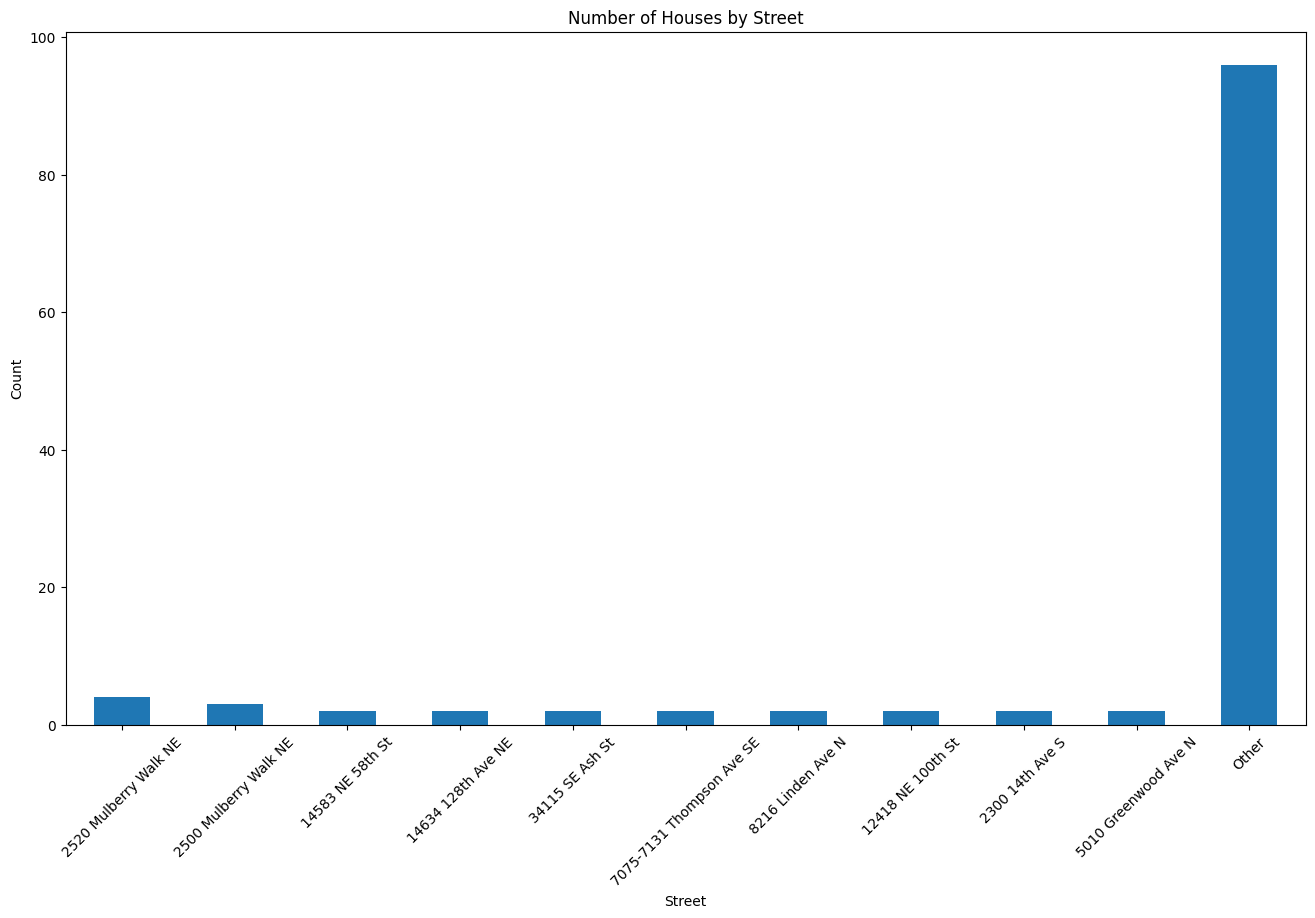

In [12]:
# Plot the bar chart
plt.figure(figsize=(16, 9))
aggregated_counts.plot(kind='bar')
plt.title('Number of Houses by Street')
plt.xlabel('Street')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4140 non-null   float64
 1   bedrooms       4140 non-null   float64
 2   bathrooms      4140 non-null   float64
 3   sqft_living    4140 non-null   int64  
 4   sqft_lot       4140 non-null   int64  
 5   floors         4140 non-null   float64
 6   waterfront     4140 non-null   int64  
 7   view           4140 non-null   int64  
 8   condition      4140 non-null   int64  
 9   sqft_above     4140 non-null   int64  
 10  sqft_basement  4140 non-null   int64  
 11  yr_built       4140 non-null   int64  
 12  yr_renovated   4140 non-null   int64  
 13  street         4140 non-null   object 
 14  city           4140 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 485.3+ KB


In [14]:
dataset.select_dtypes(include = 'object').columns

Index(['street', 'city'], dtype='object')

In [15]:
len(dataset.select_dtypes(include = 'object').columns)

2

**Lets handle Categorical Values**

In [16]:
# Perform one-hot encoding for 'street' and 'city' columns
dataset= pd.get_dummies(dataset, columns=['street', 'city'], drop_first = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,...,False,True,False,False,False,False,False,False,False,False
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,...,False,False,False,False,False,False,False,False,False,False
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,...,False,False,False,False,False,False,False,False,False,False
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,...,False,True,False,False,False,False,False,False,False,False
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,...,False,True,False,False,False,False,False,False,False,False


In [17]:
dataset.select_dtypes(include = 'object').columns

Index([], dtype='object')

**Check and handle missing values**

In [18]:
dataset.isnull().values.any()

False

**Feature Scaling and Feature Engineering**

In [19]:
# Perform feature engineering - create a new feature 'total_area' by adding 'sqft_living' and 'sqft_lot'
dataset['total_area'] = dataset['sqft_living'] + dataset['sqft_lot']
dataset = dataset.drop(['sqft_living', 'sqft_lot'], axis = 'columns')
dataset.head(2)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,total_area
0,376000.0,3.0,2.00,3.0,0,0,3,1340,0,2008,...,True,False,False,False,False,False,False,False,False,2724
1,800000.0,4.0,3.25,2.0,0,0,3,3540,0,2007,...,False,False,False,False,False,False,False,False,False,162970


In [20]:
dataset.shape

(4140, 4132)

In [21]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset.drop(['price'], axis=1))

# Create a new DataFrame with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=dataset.drop(['price'], axis=1).columns)
# df_scaled.head()
# Train a Random Forest model to identify important features
X = df_scaled
y = dataset['price']

**Let's Create Train and test for model**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

**Let's train the model using Random Forest**

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 54372268707.06801
R-squared (R2) Score: 0.48135605588927854


**Bar Plot of important Features identify by RF**

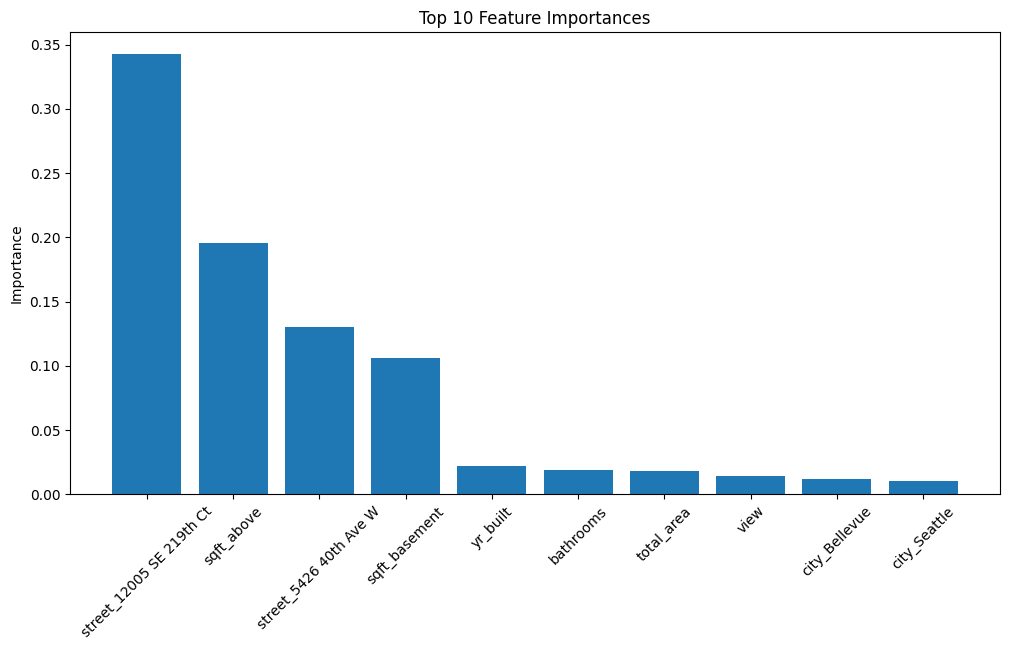

In [25]:
# Get feature importances
feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': df_scaled.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = feature_importances_df.head(10)

# Plot feature importances for the top 10 features
plt.figure(figsize=(12, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'])
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()

**Artificial Neural Network (ANN)**

In [26]:
from sklearn.neural_network import MLPRegressor

In [27]:
#Train the ANN Model
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the Model
y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# Calculate Metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
print(f"Training R2 Score: {r2_train}")
print(f"Testing R2 Score: {r2_test}")

Training MSE: 149967141171.08405
Testing MSE: 306863466689.2414
Training R2 Score: 0.6245970198259996
Testing R2 Score: -1.927096522763053


**Optimization of RF using Grid Search**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

2024-07-25 18:15:57.652293: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 18:15:57.652454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 18:15:57.834717: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:
# Define and Compile the ANN Model
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the Model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the Model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 633007702016.0000 - val_loss: 1512480440320.0000
Epoch 2/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 507556659200.0000 - val_loss: 1512437448704.0000
Epoch 3/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 549915262976.0000 - val_loss: 1512240054272.0000
Epoch 4/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 538790035456.0000 - val_loss: 1511818395648.0000
Epoch 5/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 462461698048.0000 - val_loss: 1511110606848.0000
Epoch 6/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 461228441600.0000 - val_loss: 1510083526656.0000
Epoch 7/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 459943542784.0000 - val_loss: 1508772282368.0000
Epoch 8/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 458046898176.0000 - val_loss: 1507187097600.0000
Epoch 9/500
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 357281300480.0000 - val_loss: 1505466253312.0000
Epoch 10/500
83/83 ━━━━━━━━━

In [31]:
# Calculate Metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")
print(f"Training R2 Score: {r2_train}")
print(f"Testing R2 Score: {r2_test}")

Training MSE: 252838428165.3118
Testing MSE: 179716138427.57776
Training R2 Score: 0.36708602501472964
Testing R2 Score: -0.7142688556291719
